## 유니콘기업_찾기, 5/5회의록을 기반으로

- 직원 하한수 40명, 상한 300명
- 매출액 매출 성장률 20% 이상 or 가장 최근의 매출 100억 이상
- 매출액의 하한선 평균 250억
- 월평균 보험률의 증가율 (평균 1%로 선정)- 보험평균 시각화를 통해 꾸준히 상승하고 있는 기업 컨택
- 3년 이상 존재 (최근날짜에 상관 없이 연속성을 가진 기업)

### 데이터셋 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

#한국어 폰트
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


In [2]:
#실수 설정 옵션
pd.options.display.float_format = '{:.2f}'.format

In [3]:
uni = pd.read_csv('company_nps_data.csv')

In [4]:
uni

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


In [5]:
uni.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,99801.00,99801.00,99801.00,99801.00,99801.00,99801.00
mean,276298.17,30535893.43,2016.97,6.71,9734079.21,37.62
std,133903.15,301664669.02,0.98,3.51,43472560.17,146.95
min,63.00,-7882176.00,2015.00,1.00,0.00,0.00
25%,165530.00,1409760.00,2016.00,4.00,1181160.00,6.00
50%,259149.00,3573585.00,2017.00,7.00,2332760.00,11.00
75%,382656.00,9582321.00,2018.00,10.00,5591860.00,24.00
max,5159723.00,11328779396.00,2019.00,12.00,978067260.00,3133.00


- null값 x

## 처리 
- 직원 하한 40명
- 상한 300명
- 매출액 하한 250억
- 날짜 데이터 3년 이상 

In [6]:
#직원 하한 40명
#매출액 하한 250억
uni = uni[(uni['월별_직원수'] > 40) &(uni['월별_직원수']<300) & (uni['연매출액'] > 25000000)]
uni

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
19,129310,43360251,2018,9,37862680,149
43,294790,96411248,2016,5,40334140,198
55,231080,152393780,2018,7,51609300,160
64,231576,44099806,2015,12,26365420,81
65,231080,132542490,2017,8,42458520,144
...,...,...,...,...,...,...
99656,613233,64680782,2018,11,29281380,112
99728,130023,41902353,2016,2,24408120,111
99737,132623,26420561,2015,12,13270800,64
99757,128174,106106973,2017,2,51496520,192


In [7]:
# 연도와 월을 묶어서 컬럼 형성
uni['날짜'] = pd.to_datetime(uni['년도'].astype(str) + uni['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')

#uni

C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

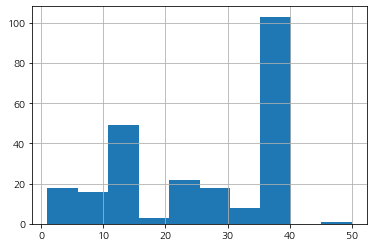

In [8]:
uni.groupby('회사ID')['날짜'].count().hist()

In [9]:
df_uni = uni[uni.groupby('회사ID').날짜.transform('count')>35]

array([[<AxesSubplot:title={'center':'날짜'}>]], dtype=object)

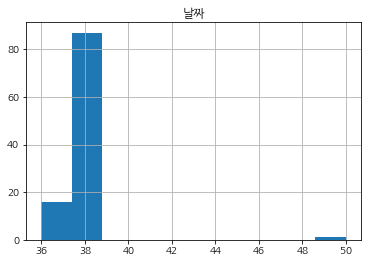

In [10]:
df_uni[['회사ID', '날짜']].groupby(['회사ID']).count().hist()


- 36개월 이상 존재하는 기업
- 직원수, 연매출액 하한 설정 

## 매출액, 매출 성장률  확인
- 매출액 매출 성장률 20% 이상 or 가장 최근의 매출 100억 이상 
- 매출액 pct_change메서드를 통해 확인

In [11]:
def percent(df_uni, x):
    com_20 = []
    df_num = df_uni.groupby('회사ID').get_group(x).sort_values(['날짜']).drop_duplicates(['연매출액']) 
    if df_num['연매출액'].pct_change().max() >=0.2:
        com_20.append(x)
        com_20
        print('매출성장률이 20%이상 회사 : ', com_20)
    return com_20
      

In [12]:
com_list = df_uni['회사ID'].drop_duplicates()
com_list.to_list()
for x in com_list:
    percent(df_uni, x)
list_com = percent(df_uni,x)    

매출성장률이 20%이상 회사 :  [294790]
매출성장률이 20%이상 회사 :  [420304]
매출성장률이 20%이상 회사 :  [231383]
매출성장률이 20%이상 회사 :  [420165]
매출성장률이 20%이상 회사 :  [296986]
매출성장률이 20%이상 회사 :  [231897]
매출성장률이 20%이상 회사 :  [420082]
매출성장률이 20%이상 회사 :  [297441]
매출성장률이 20%이상 회사 :  [227989]
매출성장률이 20%이상 회사 :  [134484]
매출성장률이 20%이상 회사 :  [295618]
매출성장률이 20%이상 회사 :  [133951]
매출성장률이 20%이상 회사 :  [128264]
매출성장률이 20%이상 회사 :  [130899]
매출성장률이 20%이상 회사 :  [231703]
매출성장률이 20%이상 회사 :  [122968]
매출성장률이 20%이상 회사 :  [470125]
매출성장률이 20%이상 회사 :  [129370]
매출성장률이 20%이상 회사 :  [132335]
매출성장률이 20%이상 회사 :  [130386]
매출성장률이 20%이상 회사 :  [231972]
매출성장률이 20%이상 회사 :  [404634]
매출성장률이 20%이상 회사 :  [128174]
매출성장률이 20%이상 회사 :  [130344]
매출성장률이 20%이상 회사 :  [130911]
매출성장률이 20%이상 회사 :  [132156]
매출성장률이 20%이상 회사 :  [129718]
매출성장률이 20%이상 회사 :  [231173]
매출성장률이 20%이상 회사 :  [135634]
매출성장률이 20%이상 회사 :  [130281]
매출성장률이 20%이상 회사 :  [127503]
매출성장률이 20%이상 회사 :  [132164]
매출성장률이 20%이상 회사 :  [426429]
매출성장률이 20%이상 회사 :  [231384]
매출성장률이 20%이상 회사 :  [130023]
매출성장률이 20%이상 회사 :  [

In [16]:
# 가장 최근 매출 100억 이상 확인
df_uni.describe()
#연매출액 25% 도 백억을 거뜬히 넘으니 매출성장률을 먼저 보고 집중하는것이 맞는 것 같다

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,3934.00,3934.00,3934.00,3934.00,3934.00,3934.00
mean,208704.60,127307493.28,2016.92,6.73,32920959.49,117.06
std,108394.66,398705405.59,0.92,3.53,18402393.26,58.39
min,122968.00,25300385.00,2015.00,1.00,8101900.00,41.00
25%,129828.00,37946909.00,2016.00,4.00,18476640.00,70.00
50%,132760.00,52349476.00,2017.00,7.00,28100270.00,101.00
75%,295376.00,94801718.00,2018.00,10.00,43860325.00,155.75
max,470125.00,4152465961.00,2019.00,12.00,113081660.00,297.00


In [20]:
 df_num = df_uni.groupby('회사ID').get_group(132156).sort_values(['날짜']).drop_duplicates(['연매출액'])

### 리스트업 된 데이터로 연금 보험 평균 시각화
- 시각화 했을 때 오름세를 보고 판단
- 월간 보험증가율을 계산했기 때문에 수치를 1%로 낮게 잡고 진행
- 평균은 급격한 데이터의 영향을 심하게 받기 때문에 고점에 대한 부분 제외 하는게 맞다 생각

In [28]:
#위에서 뽑은 회사아이디 리스트 업 
per_list= [294790,420304,231383,420165,296986,231897,
           420082,297441,227989,134484,295618,133951,
           128264,130899,231703,122968,470125,129370,
           132335,130386,231972,404634,128174,130344,
           130911,132156,129718,231173,135634,130281,
           127503,132164,426429,231384,130023,129436]

In [22]:
df_uni.insert(6, '연금보험평균',uni['월별_연금보험료']//uni['월별_직원수'])

In [23]:
df_uni

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연금보험평균,날짜
19,129310,43360251,2018,9,37862680,149,254111,201809
43,294790,96411248,2016,5,40334140,198,203707,201605
55,231080,152393780,2018,7,51609300,160,322558,201807
64,231576,44099806,2015,12,26365420,81,325499,201512
65,231080,132542490,2017,8,42458520,144,294850,201708
...,...,...,...,...,...,...,...,...
99606,131723,58105359,2017,5,12543060,60,209051,201705
99645,231897,59092874,2016,3,16373480,67,244380,201603
99728,130023,41902353,2016,2,24408120,111,219892,201602
99757,128174,106106973,2017,2,51496520,192,268211,201702


In [99]:
def ins_percent(df_uni, x):
    com_ins = []
    df_num = df_uni.groupby('회사ID').get_group(x).sort_values(['날짜'])
    if df_num['월별_연금보험료'].pct_change().mean() >0.01:
        com_ins.append(x)
        com_ins
        print('월별_연금보험료 평균 %이상 회사 : ', com_ins)
    return com_ins

In [100]:
#연금보험가격 전월 대비 증가율 평균 1퍼센트의 회사
for x in per_list:
    ins_percent(df_uni, x) 

월별_연금보험료 평균 %이상 회사 :  [420165]
월별_연금보험료 평균 %이상 회사 :  [295618]
월별_연금보험료 평균 %이상 회사 :  [133951]
월별_연금보험료 평균 %이상 회사 :  [130899]
월별_연금보험료 평균 %이상 회사 :  [231703]
월별_연금보험료 평균 %이상 회사 :  [130344]
월별_연금보험료 평균 %이상 회사 :  [130911]
월별_연금보험료 평균 %이상 회사 :  [132156]
월별_연금보험료 평균 %이상 회사 :  [135634]
월별_연금보험료 평균 %이상 회사 :  [127503]
월별_연금보험료 평균 %이상 회사 :  [132164]


In [104]:
ins_list = [420165, 295618, 133951, 130899, 231703,130344,130911,132156,135634,127503,132164 ]

In [105]:
def lineploting(df_uni, x):
    df_num = df_uni.groupby('회사ID').get_group(x).sort_values(['날짜'])
    print("회사ID", x)
    f, ax = plt.subplots(1,1, figsize = (15,8))
    plt.plot(df_num['날짜'].sort_values(), df_num['연금보험평균'])
    plt.xticks(rotation=45)
    plt.title('날짜별 연금보험평균', fontsize=20)
    plt.show()

회사ID 420165


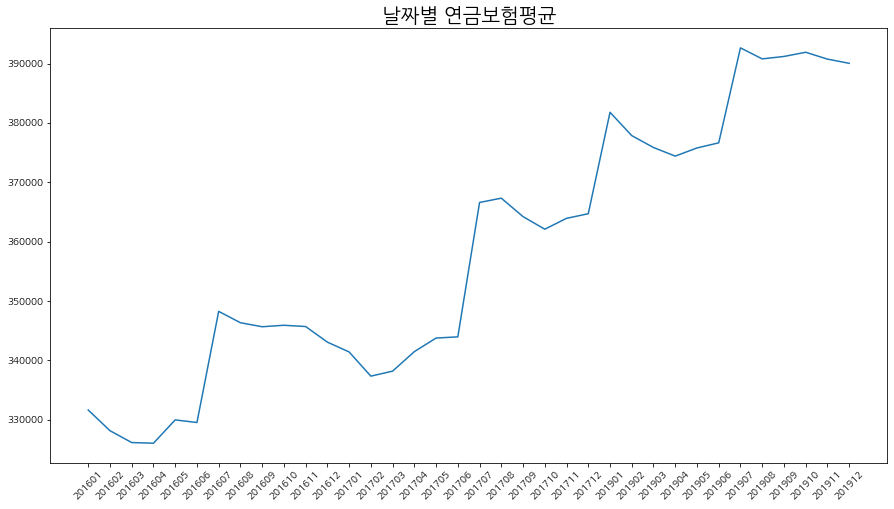

회사ID 295618


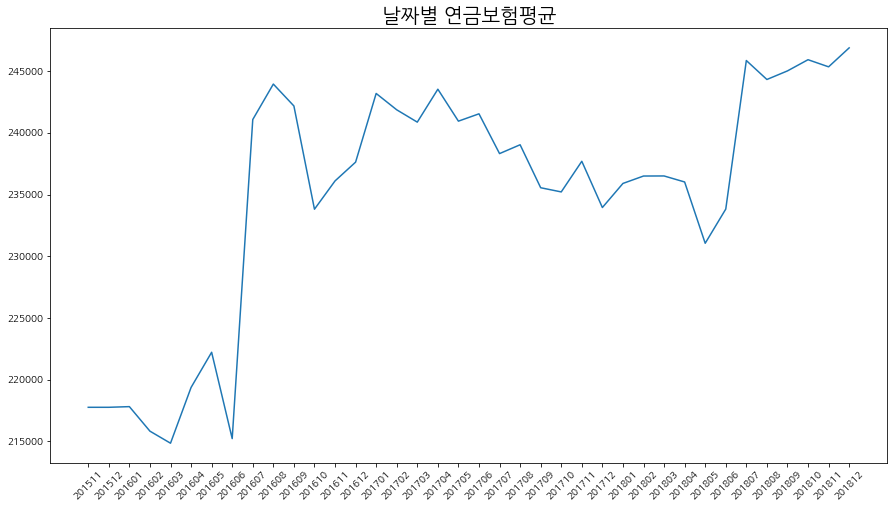

회사ID 133951


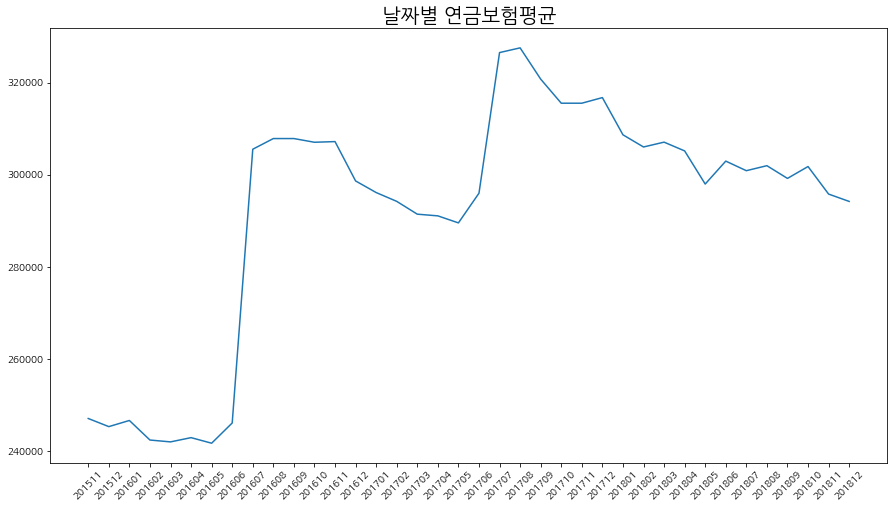

회사ID 130899


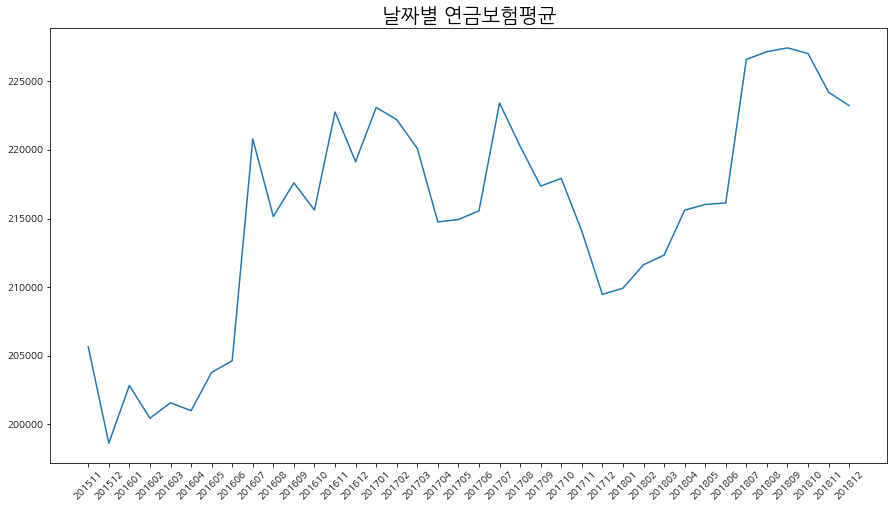

회사ID 231703


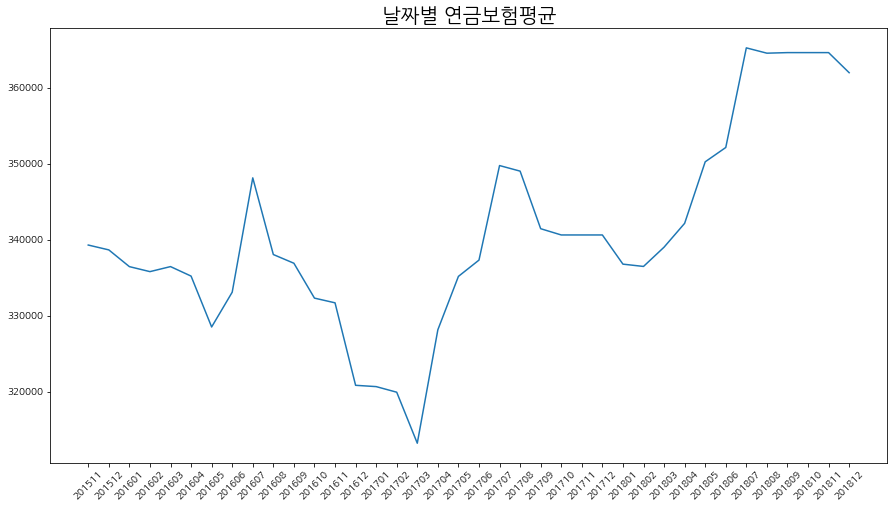

회사ID 130344


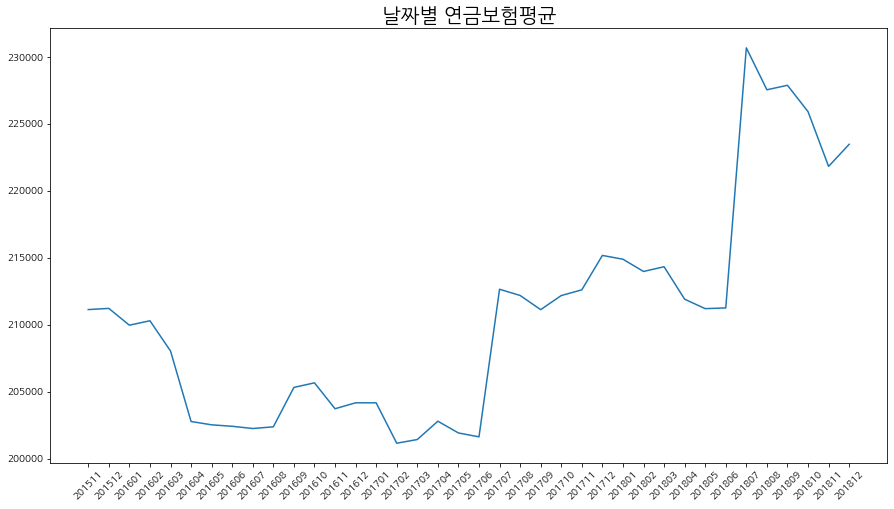

회사ID 130911


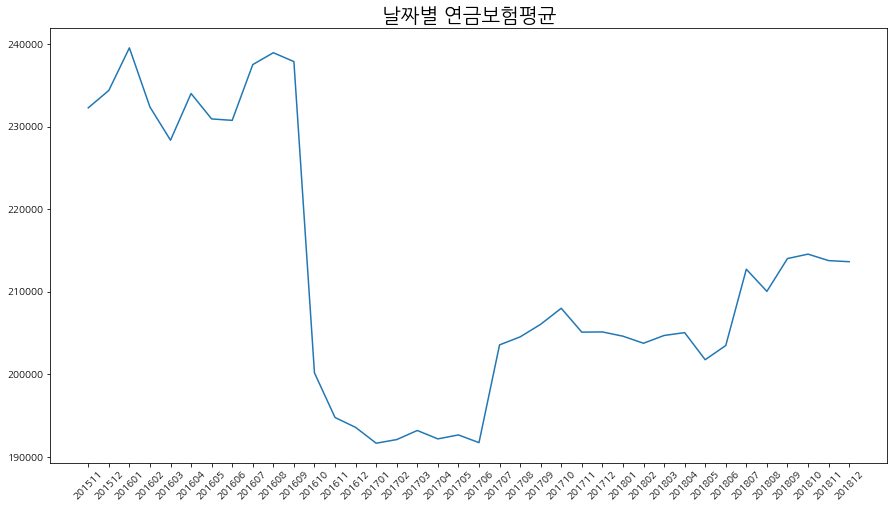

회사ID 132156


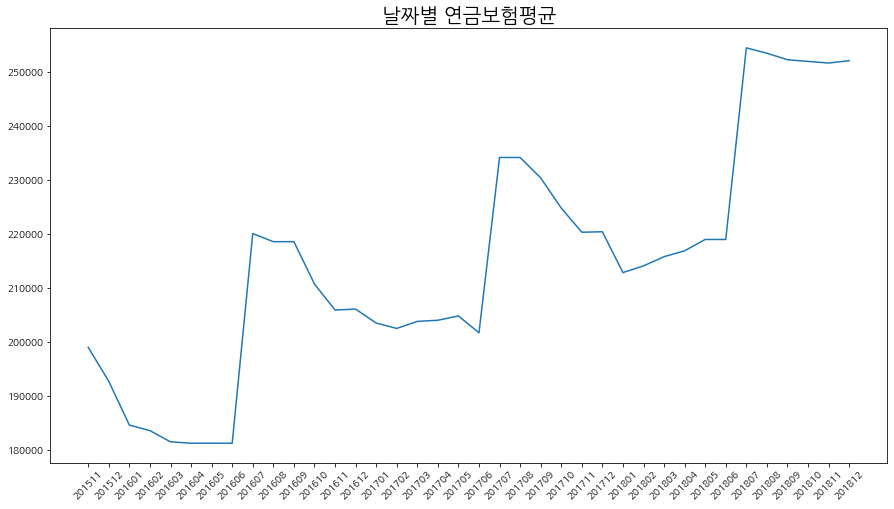

회사ID 135634


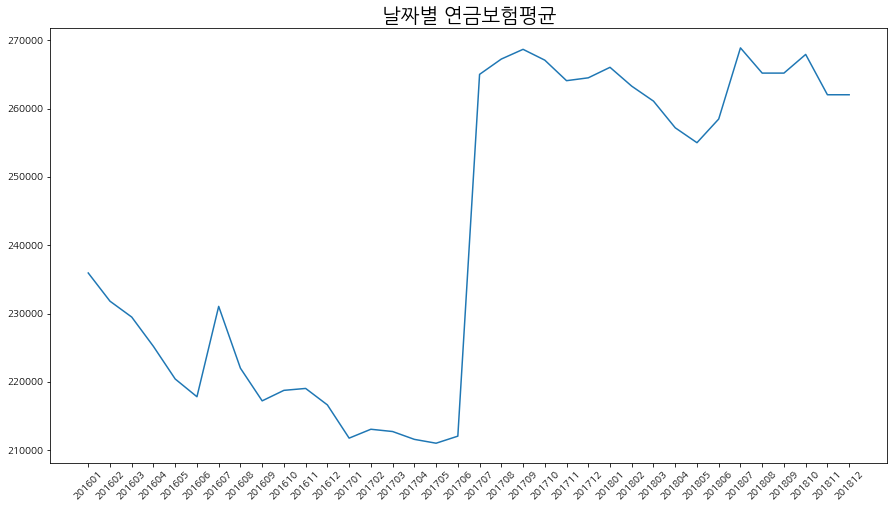

회사ID 127503


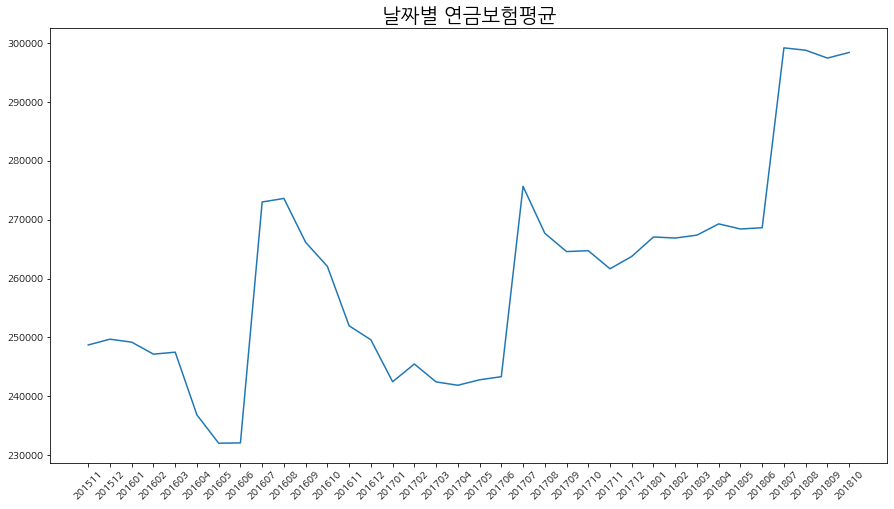

회사ID 132164


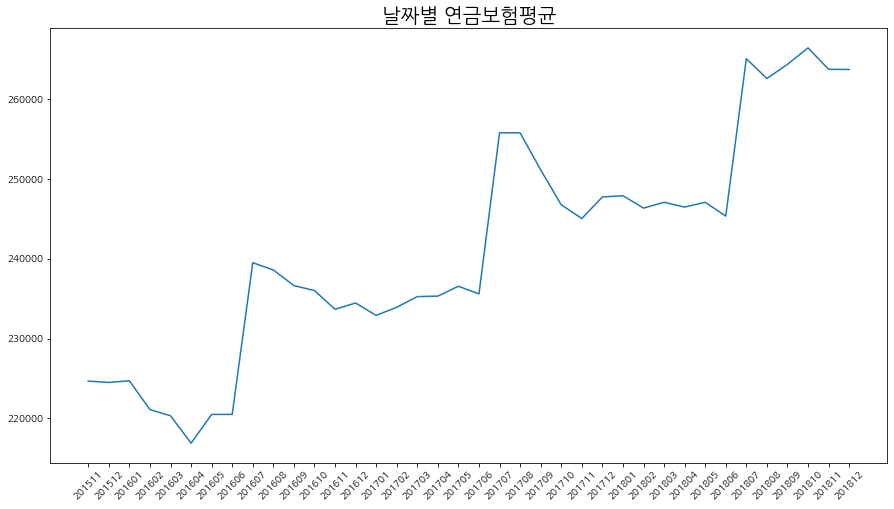

In [106]:
for x in ins_list:
    lineploting(df_uni, x)

In [ ]:
#버려야할 295618, 133951,130899,231703,130911,135634,127503, 

In [108]:
df_num = df_uni.groupby('회사ID').get_group(132164).sort_values(['날짜'])

df_num['월별_연금보험료'].pct_change().mean()

0.016059079401808733

### 조건을 통해 추려본 ID
[420165,130344,132156,132164]